Feito por Emanuelle Moço e Manoela Campos

# Entregável 1 - visão computacional

In [15]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


# Equalização de histograma

In [16]:
rintin = cv2.imread("RinTinTin.jpg")

In [17]:
rintin.shape

(240L, 320L, 3L)

In [18]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [19]:
rintin_gray.shape

(240L, 320L)

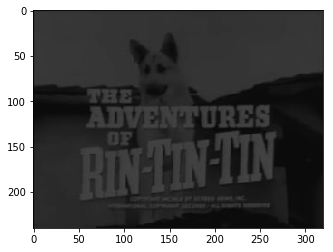

In [20]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

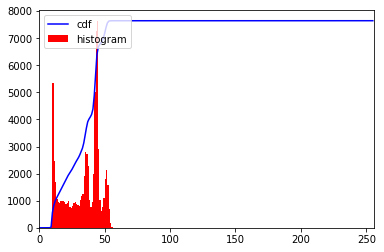

In [21]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1 - O histograma fornecido não aproveita bem as faixas de cores. A imagem só usa as faixas de cores de 8 até 58, porem poderia usar de 0 até 255

In [22]:
#maior nível 
rintin_gray.max()

58

In [23]:
#menor nível 
rintin_gray.min()

8

In [24]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

In [25]:
novo = []
for i in rintin_gray.flatten():
    novo.append(i*(5)-40)


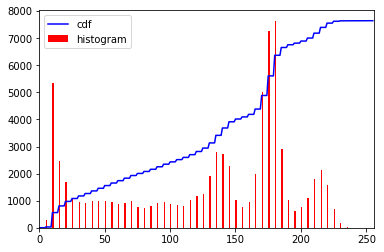

In [26]:
hist,bins = np.histogram(novo,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(novo,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()    

In [27]:
novoimg = []
for i in rintin_gray:
    novoimg.append(i*(5)-40)


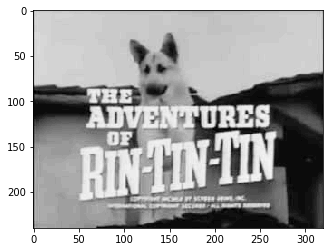

In [28]:
plt.imshow(novoimg, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


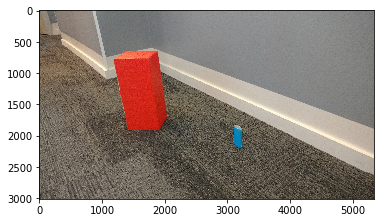

In [29]:
imagem = cv2.imread("hall_box_battery1.jpg")
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb, interpolation="none")

In [30]:
img_R = imagem_rgb[:,:,0] #canais R
img_B = imagem_rgb[:,:,2] #canais B

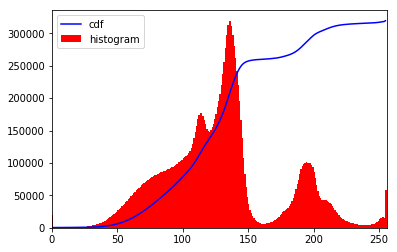

In [31]:
#red
hist,bins = np.histogram(img_R.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_R.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#EXPLICAR 
#A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

A partir do canal R, não é possível identificar a caixa vermelha através da análise do histograma. Isso acontece pois existe uma grande quantidade de tons cinzas na imagem que contém vermelho. Além disso, o rodapé é claro e "contamina" a detecção do vermelho, pois para obter branco todas as cores estarão presentes em grande quantidade (braco = 255,255,255), o que não permite que tenhamos certeza que algum dos picos de vermelho do gráfico representa a caixa. O mesmo acontece para o azul do isqueiro. Não é possível garantir sua detecção no gráfico apenas observando os picos de cor e claridade presentes nele.


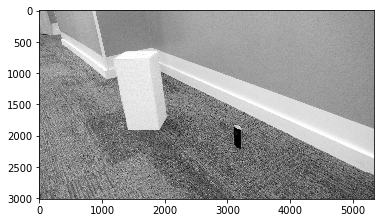

In [33]:
plt.imshow(img_R, cmap='Greys_r')

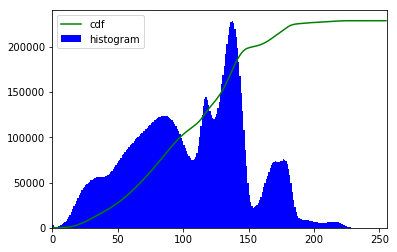

In [18]:
#blue
hist,bins = np.histogram(img_B.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'g')
plt.hist(img_B.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

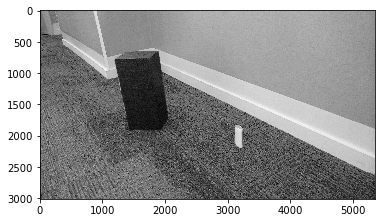

In [19]:
plt.imshow(img_B, cmap='Greys_r')

In [20]:
tentativa = img_R - 0.8*img_B

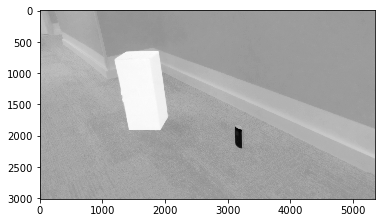

In [21]:
plt.imshow(tentativa, cmap='Greys_r')

In [22]:
tentativa.shape[0]

3006L

In [23]:
tentativa.shape[1]

5344L

In [24]:
for i in range(tentativa.shape[0]):
    for j in range(tentativa.shape[1]):
        if tentativa[i][j] < 100:
            tentativa[i][j] = 0

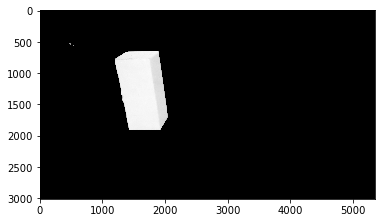

In [25]:
plt.imshow(tentativa, cmap='Greys_r')